# 合并数据集

## 数据库风格的DataFrame合并
按照键进行合并

In [1]:
import pandas as pd
from numpy import *
import numpy as np

In [3]:
df1 = pd.DataFrame({'key':['b','b','a','c','a','a','b'],
                   'data1':arange(7)})
df1

,data1,key
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,a
6,6,b


In [4]:
df2 = pd.DataFrame({'key':['a','b','d'],
                   'data1':arange(3)})
df2

,data1,key
0,0,a
1,1,b
2,2,d


In [5]:
#　根据ｋｅｙ列连接
pd.merge(df1,df2,on='key')

,data1_x,key,data1_y
0,0,b,1
1,1,b,1
2,6,b,1
3,2,a,0
4,4,a,0
5,5,a,0


In [7]:
# 当key名不一样时
df3= pd.DataFrame({'lkey':['b','b','a','c','a','a','b'],
                   'data1':arange(7)})
df4= pd.DataFrame({'rkey':['a','b','d'],
                   'data1':arange(3)})
pd.merge(df3,df4,left_on='lkey',right_on='rkey')

,data1_x,lkey,data1_y,rkey
0,0,b,1,b
1,1,b,1,b
2,6,b,1,b
3,2,a,0,a
4,4,a,0,a
5,5,a,0,a


In [9]:
# 外链接
pd.merge(df1,df2,how='outer',on='key')

,data1_x,key,data1_y
0,0.0,b,1.0
1,1.0,b,1.0
2,6.0,b,1.0
3,2.0,a,0.0
4,4.0,a,0.0
5,5.0,a,0.0
6,3.0,c,NaN
7,NaN,d,2.0


In [10]:
# 左链接
pd.merge(df1,df2,how='left',on='key')

,data1_x,key,data1_y
0,0,b,1.0
1,1,b,1.0
2,2,a,0.0
3,3,c,NaN
4,4,a,0.0
5,5,a,0.0
6,6,b,1.0


In [11]:
# 右链接
pd.merge(df1,df2,how='right',on='key')

,data1_x,key,data1_y
0,0.0,b,1
1,1.0,b,1
2,6.0,b,1
3,2.0,a,0
4,4.0,a,0
5,5.0,a,0
6,NaN,d,2


In [14]:
#  根据多个键合并
left = pd.DataFrame({'key1':['foo','foo','bar'],
                    'key2':['one','two','one'],
                    'lval':[1,2,3]})
right = pd.DataFrame({'key1':['foo','foo','bar','bar'],
                    'key2':['one','one','one','two'],
                    'rval':[4,5,6,7]})
pd.merge(left,right,on=['key1','key2'],how = 'outer')

,key1,key2,lval,rval
0,foo,one,1.0,4.0
1,foo,one,1.0,5.0
2,foo,two,2.0,NaN
3,bar,one,3.0,6.0
4,bar,two,NaN,7.0


In [15]:
# 自动修改重复的列名
pd.merge(left, right, on = 'key1', suffixes = ('_left','_right'))

,key1,key2_left,lval,key2_right,rval
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


## 索引上的合并
有时候，DataFrame中的连接键位位于其索引中。在这种情况下可以传入left_index=True或right_index=True

In [26]:
left1 = pd.DataFrame({'key':['a','b','a','a','b','c'],
                   'data1':arange(6)})
right1= pd.DataFrame({'group':[3.5,7]},
                   index=['a','b'])
pd.merge(left1,right1,left_on='key',right_index=True)

,data1,key,group
0,0,a,3.5
2,2,a,3.5
3,3,a,3.5
1,1,b,7.0
4,4,b,7.0


In [32]:
# 层次化索引的情况
lefth = pd.DataFrame({'key1':['Ohio','Ohio','Ohio','Nevada','Nevada'],
                      'key2':[2000,2001,2002,2001,2002],
                      'data':arange(5.)})
righth = pd.DataFrame(arange(12.).reshape((6,2)),
                      index = [['Nevada','Nevada','Ohio','Ohio','Ohio','Ohio'],
                               [2001,2000,2000,2000,2001,2002]],
                      columns=['event1','event2'])

In [33]:
lefth

,data,key1,key2
0,0.0,Ohio,2000
1,1.0,Ohio,2001
2,2.0,Ohio,2002
3,3.0,Nevada,2001
4,4.0,Nevada,2002


In [35]:
righth

event1  event2
Nevada 2001     0.0     1.0
       2000     2.0     3.0
Ohio   2000     4.0     5.0
       2000     6.0     7.0
       2001     8.0     9.0
       2002    10.0    11.0

In [37]:
pd.merge(lefth,righth,left_on=['key1','key2'],right_index=True)

,data,key1,key2,event1,event2
0,0.0,Ohio,2000,4.0,5.0
0,0.0,Ohio,2000,6.0,7.0
1,1.0,Ohio,2001,8.0,9.0
2,2.0,Ohio,2002,10.0,11.0
3,3.0,Nevada,2001,0.0,1.0


In [41]:
# 同时合并双方的索引
left2 = pd.DataFrame([[1.,2.],[3.,4.],[5.,6.]],
                     index = ['a','b','c'],
                     columns = ['Ohio','Nevada'])
right2 = pd.DataFrame([[7.,8.],[9.,10.],[11.,12.],[13.,14.]],
                      index = ['b','c','d','e'],
                      columns = ['Missouri','Alabama'])
pd.merge(left2,right2,how='outer',left_index=True,right_index=True)

,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,3.0,4.0,7.0,8.0
c,5.0,6.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,NaN,NaN,13.0,14.0


DataFrame有一个join实例方法，可以更方便地实现**索引合并**。它可以合并多个带有相同或相似索引的DataFrame对象，而不管它们之间有没有重叠的列。

In [42]:
# 比如：
left2.join(right2,how='outer')

,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,3.0,4.0,7.0,8.0
c,5.0,6.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,NaN,NaN,13.0,14.0


## 轴向连接
另一种数据合并运算也被称作连接（concatenation）、绑定(binding)或堆叠(stacking)

In [49]:
# 如数组的连接
arr = arange(12).reshape((3,4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [50]:
concatenate([arr,arr],axis=1)  # np.concatenation

array([[ 0,  1,  2,  3,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  4,  5,  6,  7],
       [ 8,  9, 10, 11,  8,  9, 10, 11]])

pandas对象中，带有标签的轴可以进一步推广数组的连接运算

In [51]:
s1 = pd.Series([0,1],index = ['a','b'])
s2 = pd.Series([2,3,4],index=['c','d','e'])
s3 = pd.Series([5,6],index = ['f','g'])

In [52]:
pd.concat([s1,s2,s3])  # 默认情况下 concat axis = 0

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

In [53]:
pd.concat([s1,s2,s3],axis=1)  # 列连接

,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [56]:
s4 = pd.concat([s1*5,s3])
s4

a    0
b    5
f    5
g    6
dtype: int64

In [57]:
pd.concat([s1,s4],axis=1,join='inner')

,0,1
a,0,0
b,1,5


In [59]:
# 指定在其他轴上使用的索引
pd.concat([s1,s4],axis=1,join_axes=[['a','c','b','e']])

,0,1
a,0.0,0.0
c,NaN,NaN
b,1.0,5.0
e,NaN,NaN


In [60]:
# 若将参与连接的片段分开,方便识别原来各段的内容
result = pd.concat([s1,s2,s3],keys = ['one','two','three'])
result

one    a    0
       b    1
two    c    2
       d    3
       e    4
three  f    5
       g    6
dtype: int64

In [61]:
result.unstack()

,a,b,c,d,e,f,g
one,0.0,1.0,NaN,NaN,NaN,NaN,NaN
two,NaN,NaN,2.0,3.0,4.0,NaN,NaN
three,NaN,NaN,NaN,NaN,NaN,5.0,6.0


In [62]:
result = pd.concat([s1,s2,s3],axis=1,keys = ['one','two','three'])
result

,one,two,three
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [70]:
# 同样的逻辑对DataFrame对象也是一样的
df1 = pd.DataFrame(arange(6).reshape(3,2),index = ['a','b','c'],columns = ['one','two'])

In [71]:
df2= pd.DataFrame(5+arange(4).reshape(2,2),index = ['a','c'],columns = ['three','four'])

In [73]:
df1

,one,two
a,0,1
b,2,3
c,4,5


In [74]:
df2

,three,four
a,5,6
c,7,8


In [76]:
pd.concat([df1,df2],axis=1,keys=['level1','level2'])

level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

In [77]:
# 如果传入的是一个列表而不是字典，则字典的键则会被当做keys

pd.concat({'level1':df1,'level2':df2},axis=1)

level1     level2     
     one two  three four
a      0   1    5.0  6.0
b      2   3    NaN  NaN
c      4   5    7.0  8.0

In [80]:
# 为层次化索引设置管理参数
pd.concat([df1,df2],axis=1,keys=['level1','level2'],names = ['upper','lower'])

upper level1     level2     
lower    one two  three four
a          0   1    5.0  6.0
b          2   3    NaN  NaN
c          4   5    7.0  8.0

In [81]:
# 忽略与当前工作无关的行索引
df1 = pd.DataFrame(random.randn(3,4),columns=['a','b','c','d'])
df2 = pd.DataFrame(random.randn(2,3),columns=['b','d','a'])

In [84]:
pd.concat([df1,df2])

,a,b,c,d
0,-0.537749,1.043746,0.268367,-0.286086
1,-1.663991,0.788386,-1.405869,0.301618
2,0.506617,0.172786,0.545515,-1.142720
0,0.395258,0.403593,NaN,0.319532
1,-1.031578,-0.226782,NaN,1.334228


In [86]:
pd.concat([df1,df2],ignore_index=True)  # 索引继续顺序产生

,a,b,c,d
0,-0.537749,1.043746,0.268367,-0.286086
1,-1.663991,0.788386,-1.405869,0.301618
2,0.506617,0.172786,0.545515,-1.142720
3,0.395258,0.403593,NaN,0.319532
4,-1.031578,-0.226782,NaN,1.334228


## 合并重叠数据

有一些问题，不能用简单的合并或连接操作来处理。比如，可能需要索引全部或者部分重叠的两个数据集。这就需要用到np.where操作，它用于表达一种矢量化的if-else

In [90]:
a = pd.Series([np.nan,2.5,np.nan,3.5,4.5,np.nan],index = ['f','e','d','c','b','a'])
b = pd.Series(arange(len(a),dtype=np.float64),index= ['f','e','d','c','b','a'])
b[-1]=np.nan

In [92]:
a

f    NaN
e    2.5
d    NaN
c    3.5
b    4.5
a    NaN
dtype: float64

In [93]:
b

f    0.0
e    1.0
d    2.0
c    3.0
b    4.0
a    NaN
dtype: float64

In [91]:
np.where(pd.isnull(a),b,a)

array([ 0. ,  2.5,  2. ,  3.5,  4.5,  nan])

**combine_first**对象可以实现类似的功能，可以看做用参数对象中的数据为调用者对象的缺失数据“打补丁”

In [97]:
df1 = pd.DataFrame({'a':[1,np.nan,5,np.nan],
                   'b':[np.nan,2,np.nan,6],
                    'c':arange(2,18,4)})
df2 = pd.DataFrame({'a':[5,4,np.nan,3,7],
                   'b':[np.nan,3,4,6,8]})

In [99]:
df1.combine_first(df2)

,a,b,c
0,1.0,NaN,2.0
1,4.0,2.0,6.0
2,5.0,4.0,10.0
3,3.0,6.0,14.0
4,7.0,8.0,NaN


# 重塑层次化索引 

层次化索引的重塑只要功能有二：
- stack:将数据的列旋转为行
- unstack：将数据的行旋转为列

In [101]:
data = pd.DataFrame(arange(6).reshape(2,3),index=pd.Index(['Ohio','Colorado'],name='state'),
                   columns = pd.Index(['one','two','three'],name='number'))
data

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [104]:
result = data.stack()
result

state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int32

In [107]:
result.unstack()

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [109]:
result.unstack('state')  #按照state轴旋转

state,Ohio,Colorado
number,,
one,0,3
two,1,4
three,2,5


In [108]:
result2 = data.unstack()
result2

number  state   
one     Ohio        0
        Colorado    3
two     Ohio        1
        Colorado    4
three   Ohio        2
        Colorado    5
dtype: int32

# 数据转换 

这一部分主要介绍过滤、清理以及其他的转换工作

##  移除重复数据

In [110]:
data = pd.DataFrame({'k1':['one']*3+['two']*4,
                    'k2':[1,1,2,3,3,4,4]})
data

,k1,k2
0,one,1
1,one,1
2,one,2
3,two,3
4,two,3
5,two,4
6,two,4


In [111]:
data.duplicated() # 判断行是否重复

0    False
1     True
2    False
3    False
4     True
5    False
6     True
dtype: bool

In [112]:
data.drop_duplicates()

,k1,k2
0,one,1
2,one,2
3,two,3
5,two,4


In [113]:
# 根据某一列移除重复行
data.drop_duplicates(['k1'])

,k1,k2
0,one,1
3,two,3


## 利用函数或映射进行数据转换

In [118]:
data = pd.DataFrame({'food':['bacon','pulled pork','bacon','Pastrami',
                             'corned beef','Bacon','pastrami','honey ham','nova lox'],
                    'ounces':[4,3,12,6,7.5,8,3,5,6]})

In [119]:
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [123]:
# 肉类到动物的映射
meat_to_animal = {'bacon':'pig','pulled pork':'pig','pastrami':'cow','corned beef':'cow',
                  'honey ham':'pig','nova lox':'salmon'}

Series 的map方法可以接受一个**函数**或者含有映射关系的**字典型对象**。但这里有个小问题，有些肉类的首字母大写了。因此，需要都转为小写

In [124]:
data['animal'] = data['food'].map(str.lower).map(meat_to_animal)
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


In [125]:
# 使用lambda映射
data['food'].map(lambda x:meat_to_animal[x.lower()])

0       pig
1       pig
2       pig
3       cow
4       cow
5       pig
6       cow
7       pig
8    salmon
Name: food, dtype: object

## 替换值

In [126]:
data = pd.Series([1.,-999,2.,-999,-1000,3.])
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

In [128]:
data.replace([-999,-1000],np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

In [129]:
data.replace([-999,-1000],[np.nan,0])   # 用不同值替代不同的值

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

In [130]:
# 写成字典的形式
data.replace({-999:np.nan,-1000:0})

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

## 重命名轴索引

In [131]:
data = pd.DataFrame(np.arange(12).reshape(3,4),
                   index = ['Ohio','Colorado','New York'],
                   columns = ['one','two','three','four'])

In [133]:
data.index = data.index.map(str.upper)  # 大写
data

,one,two,three,four
OHIO,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


In [147]:
data.rename(index= str.title,columns=str.upper)  # 新生成一个dataframe，改变name

,ONE,TWO,THREE,FOUR
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


In [143]:
data.rename(index= str.title,columns=str.upper,inplace=True) #替换原来的datafrme
data

,ONE,TWO,THREE,FOUR
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


##  离散化和面元划分
为了便于分析，连续数据常常需要被离散化为“面元”（bin）。

In [150]:
# 一组任意的年龄如下，需要划分为不同年龄组
ages = [20,22,25,27,21,23,37,31,61,45,41,32]
bins = [18,25,35,60,100]
cats = pd.cut(ages,bins)  # 默认左开右闭，right=false设置为左闭右开
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, object): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [149]:
pd.value_counts(cats)

(18, 25]     5
(35, 60]     3
(25, 35]     3
(60, 100]    1
dtype: int64

In [153]:
# 设置面元的名称
group_labels = ['Youth','YoungAdult','MiddleAged','Senior']
pd.cut(ages,bins,labels = group_labels)

[Youth, Youth, Youth, YoungAdult, Youth, ..., YoungAdult, Senior, MiddleAged, MiddleAged, YoungAdult]
Length: 12
Categories (4, object): [Youth < YoungAdult < MiddleAged < Senior]

In [156]:
# cut传递面元的数量
# 下面例子将均匀分布的数据分层四组
data = np.random.rand(20)
pd.cut(data,4,precision=2)

[(0.74, 0.95], (0.54, 0.74], (0.33, 0.54], (0.74, 0.95], (0.33, 0.54], ..., (0.74, 0.95], (0.54, 0.74], (0.54, 0.74], (0.13, 0.33], (0.13, 0.33]]
Length: 20
Categories (4, object): [(0.13, 0.33] < (0.33, 0.54] < (0.54, 0.74] < (0.74, 0.95]]

In [158]:
# qcut可以实现按照样本分位数数据进行面元划分
data = np.random.randn(1000)  #正态分布
cats = pd.qcut(data,4) # 按四分位数进行切割
cats

[[-2.893, -0.647], [-2.893, -0.647], [-2.893, -0.647], (0.733, 3.251], (0.733, 3.251], ..., (0.0223, 0.733], [-2.893, -0.647], [-2.893, -0.647], [-2.893, -0.647], (-0.647, 0.0223]]
Length: 1000
Categories (4, object): [[-2.893, -0.647] < (-0.647, 0.0223] < (0.0223, 0.733] < (0.733, 3.251]]

In [159]:
pd.value_counts(cats)

(0.733, 3.251]      250
(0.0223, 0.733]     250
(-0.647, 0.0223]    250
[-2.893, -0.647]    250
dtype: int64

##  检测和过滤异常值

In [160]:
np.random.seed(12345)

In [161]:
data = pd.DataFrame(np.random.randn(1000,4))

In [162]:
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.067684,0.067924,0.025598,-0.002298
std,0.998035,0.992106,1.006835,0.996794
min,-3.428254,-3.548824,-3.184377,-3.745356
25%,-0.774890,-0.591841,-0.641675,-0.644144
50%,-0.116401,0.101143,0.002073,-0.013611
75%,0.616366,0.780282,0.680391,0.654328
max,3.366626,2.653656,3.260383,3.927528


In [163]:
# 找出某列绝对值大小大于3的值
col = data[3]
col[np.abs(col)>3]

97     3.927528
305   -3.399312
400   -3.745356
Name: 3, dtype: float64

In [183]:
# 选出全部含有“超过3或者-3的值”的行
data[(np.abs(data)>3).any(1)]   # 注意 axis=1 是从每一**行**找有没有大于3的

,0,1,2,3
5,-0.539741,0.476985,3.248944,-1.021228
97,-0.774363,0.552936,0.106061,3.927528
102,-0.655054,-0.565230,3.176873,0.959533
305,-2.315555,0.457246,-0.025907,-3.399312
324,0.050188,1.951312,3.260383,0.963301
400,0.146326,0.508391,-0.196713,-3.745356
499,-0.293333,-0.242459,-3.056990,1.918403
523,-3.428254,-0.296336,-0.439938,-0.867165
586,0.275144,1.179227,-3.184377,1.369891
808,-0.362528,-3.548824,1.553205,-2.186301


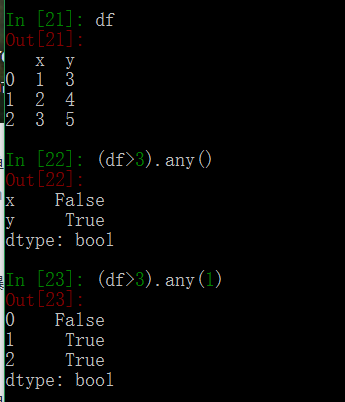  注意 axis=1 是从每一**行**找有没有大于3的

## 排列和随机采样

In [3]:
df = pd.DataFrame(arange(5*4).reshape(5,4))
df

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


In [7]:
# 随机重排序
sampler = np.random.permutation(5)
sampler

array([4, 3, 1, 2, 0])

In [11]:
# df行的随机排列，没有替换原素组
df.take(sampler)

,0,1,2,3
4,16,17,18,19
3,12,13,14,15
1,4,5,6,7
2,8,9,10,11
0,0,1,2,3


## 计算指标/哑变量

In [15]:
df = pd.DataFrame({'key':['b','b','a','c','a','b'],
                  'data1':range(6)})
pd.get_dummies(df['key'],prefix='key')  # prefix为生成的列加前缀

,key_a,key_b,key_c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [17]:
dummies = pd.get_dummies(df['key'],prefix='key') 
# df_with_dummy = pd.concat([df['data1'],dummies],axis=1)
df_with_dummy =df[['data1']].join(dummies)  # join是dataframe特定用法，series不可以

In [18]:
df_with_dummy

,data1,key_a,key_b,key_c
0,0,0,1,0
1,1,0,1,0
2,2,1,0,0
3,3,0,0,1
4,4,1,0,0
5,5,0,1,0


### movielens数据处理
如果DataFrame中的某行同属于多个分类，则就会变得更加复杂。

In [17]:
mnames = ['movie_id','title','genres']

In [18]:
movies = pd.read_table('D:/资料/python资料/利用Python进行数据分析/ch02/movielens/movies.dat',
                       sep='::',header=None,names= mnames)

d:\py3.5.2\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [19]:
movies.head(10)

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


要为每个genre添加指标变量就需要做一些数据规则操作。首先需要从数据集中抽取不同的genre值

In [34]:
genre_iter = (set(x.split('|')) for x in movies.genres) #生成器

In [35]:
# 选出所有类型的电影 并按照从小到大排序
genres = sorted(set.union(*genre_iter))  # set.union求并集  s|t
genres

['Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [36]:
dummies = pd.DataFrame(np.zeros((len(movies),len(genres))),columns=genres)
dummies.head(5)

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
# 迭代每一部电影并将dummies各行的项设置为1
for i,gen in enumerate(movies.genres):
    dummies.ix[i,gen.split('|')]=1       #比如： dummies.ix[0,['Animation','Chirldren's,'Comedy']]=1

In [38]:
# 将dummies与movies合并起来
movie_windic = movies.join(dummies.add_prefix('Genre_'))
movie_windic.ix[0]

movie_id                                       1
title                           Toy Story (1995)
genres               Animation|Children's|Comedy
Genre_Action                                   0
Genre_Adventure                                0
Genre_Animation                                1
Genre_Children's                               1
Genre_Comedy                                   1
Genre_Crime                                    0
Genre_Documentary                              0
Genre_Drama                                    0
Genre_Fantasy                                  0
Genre_Film-Noir                                0
Genre_Horror                                   0
Genre_Musical                                  0
Genre_Mystery                                  0
Genre_Romance                                  0
Genre_Sci-Fi                                   0
Genre_Thriller                                 0
Genre_War                                      0
Genre_Western       

get_dummies与cut的结合

In [40]:
values = np.random.rand(10)
bins = [0,0.2,0.4,0.6,0.8,1]

In [41]:
pd.get_dummies(pd.cut(values,bins))

,"(0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1]"
0,0,0,1,0,0
1,0,0,1,0,0
2,0,1,0,0,0
3,1,0,0,0,0
4,0,0,1,0,0
5,0,0,0,1,0
6,0,0,0,0,1
7,0,0,1,0,0
8,0,0,0,0,1
9,0,0,0,0,1


# 字符串操作

##  字符串对象方法

In [43]:
# 字符串拆分
val = 'a,b,  guido'
pieces = [x.strip() for x in val.split(',')]
pieces

['a', 'b', 'guido']

In [44]:
# 字符串连接
'::'.join(pieces)

'a::b::guido'

In [45]:
# 字符串定位， 检测子串的最佳方式是in关键字
'guido' in val

True

In [46]:
val.index(',')

1

In [47]:
val.find(':') # 如果找不到字符串，index引发一个异常，而不是返回-1

-1

In [48]:
# 字符串出现次数
val.count(',')

2

In [49]:
# 字符串替换
val.replace(',',';')

'a;b;  guido'

其他方法：
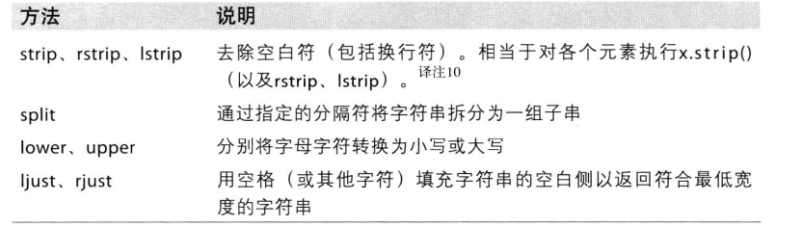

## 正则表达式

In [50]:
import re

In [56]:
# 拆分一个复杂的字符串
text = "foo   bar\t  vaz  \tqux"
print(text)

foo   bar	  vaz  	qux


In [53]:
re.split('\s+',text)

['foo', 'bar', 'vaz', 'qux']

上面方法的过程如下  
当对许多字符串应用同一条正则表达式时，推荐使用re.compile创建  
regex对象，这样可节省大量的CPU时间  

In [55]:
regex = re.compile('\s+')  
regex.split(text)

['foo', 'bar', 'vaz', 'qux']

In [57]:
# 获得匹配到的所有模式
regex.findall(text)

['   ', '\t  ', '  \t']

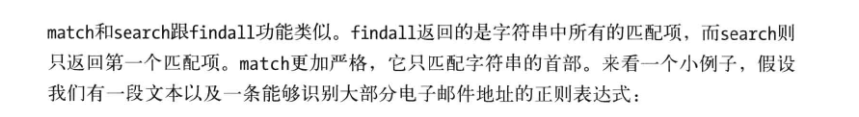

In [58]:
text = """Dave  dave@google.com
Steve  steve@gamil.com
Rob  rob@gmail.com
Ryan  ryan@yahoo.com"""

In [59]:
pattern = r'[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4}'

In [60]:
# re.IGNORECASE的作用是使正则表达式对大小写不敏感
regex = re.compile(pattern,flags = re.IGNORECASE)

In [61]:
regex.findall(text)

['dave@google.com', 'steve@gamil.com', 'rob@gmail.com', 'ryan@yahoo.com']

In [63]:
m = regex.search(text)
print(m)
text[m.start():m.end()]

<_sre.SRE_Match object; span=(6, 21), match='dave@google.com'>


'dave@google.com'

In [64]:
print(regex.match(text))

None


In [65]:
# sub方法将匹配到的模式替换为制定字符串
print(regex.sub('redacted',text))

Dave  redacted
Steve  redacted
Rob  redacted
Ryan  redacted


假设不仅需要找出电子邮件地址，还需要将各个地址分成三个部分：用户名，域名以及后缀名。  
要实现此功能，需要将待分段的模式的各部分用圆括号包起来：

In [85]:
pattern = r'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})'

In [86]:
regex = re.compile(pattern, flags=re.IGNORECASE)

In [87]:
m = regex.match('zksey@outlook.com')

In [88]:
m.groups()

('zksey', 'outlook', 'com')

In [89]:
regex.findall(text)

[('dave', 'google', 'com'),
 ('steve', 'gamil', 'com'),
 ('rob', 'gmail', 'com'),
 ('ryan', 'yahoo', 'com')]

In [105]:
# 创建带有分组名称的字典
regex = re.compile(r"""
(?P<username>[A-Z0-9._%+-]+)
@
(?P<domain>[A-Z0-9-]+)
\.
(?P<suffix>[A-Z\.]{2,10})""",flags = re.IGNORECASE|re.VERBOSE)

In [106]:
m = regex.match('zhkseu@seu.edu.cn')

In [107]:
m.groupdict()

{'domain': 'seu', 'suffix': 'edu.cn', 'username': 'zhkseu'}

## pandas中矢量化的字符串函数

In [109]:
data = {'Dave':'dave@google.com','Steve':'steve@gmail.com',
        'Rob':'rob@gamil.com','Wes':np.nan}

In [110]:
data = pd.Series(data)

In [111]:
data.str.contains('gmail')

Dave     False
Rob      False
Steve     True
Wes        NaN
dtype: object

In [113]:
pattern = r'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})'


([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})


In [114]:
data.str.findall(pattern,flags=re.IGNORECASE)

Dave     [(dave, google, com)]
Rob        [(rob, gamil, com)]
Steve    [(steve, gmail, com)]
Wes                        NaN
dtype: object

实现矢量化的元素获取操作

In [118]:
matches = data.str.match(pattern,flags=re.IGNORECASE) # 返回元组
matches

d:\py3.5.2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In future versions of pandas, match will change to always return a bool indexer.
  """Entry point for launching an IPython kernel.


Dave     (dave, google, com)
Rob        (rob, gamil, com)
Steve    (steve, gmail, com)
Wes                      NaN
dtype: object

In [119]:
matches.str.get(1)

Dave     google
Rob       gamil
Steve     gmail
Wes         NaN
dtype: object

In [120]:
matches.str[0]

Dave      dave
Rob        rob
Steve    steve
Wes        NaN
dtype: object